- use gseapy
- use decoupler
- use celltypist
- use clusterprofiler

In [1]:
import os
import gseapy as gp
import pandas as pd
import numpy as np
from cnmf import cNMF
import scanpy as sc

# 1. gseapy

In [2]:
libs = gp.get_library_name()
cell_type_libraries = [lib for lib in libs if 'cell' in lib.lower()]

In [3]:
print("Available Cell Type Libraries in Enrichr:")
for lib in cell_type_libraries:
    print(lib)

Available Cell Type Libraries in Enrichr:
ARCHS4_Cell-lines
Azimuth_Cell_Types_2021
Cancer_Cell_Line_Encyclopedia
CellMarker_2024
CellMarker_Augmented_2021
DepMap_CRISPR_GeneDependency_CellLines_2023
DepMap_WG_CRISPR_Screens_Broad_CellLines_2019
DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019
Descartes_Cell_Types_and_Tissue_2021
GO_Cellular_Component_2013
GO_Cellular_Component_2015
GO_Cellular_Component_2017
GO_Cellular_Component_2017b
GO_Cellular_Component_2018
GO_Cellular_Component_2021
GO_Cellular_Component_2023
NCI-60_Cancer_Cell_Lines
SubCell_BarCode


In [2]:
adata = sc.read_h5ad('../output/tumor_only/subcluster_tumor.h5ad')
adata

AnnData object with n_obs × n_vars = 13249 × 12431
    obs: 'sample_id', 'sample_info', 'age', 'sex', 'barcode', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'scDblFinder_score', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'cell_type', 'grade', 'GFP', 'leiden_res1', 'wb_anno', 'wb_conf_score', 'cellid_prediction', 'leiden_res2', 'new_cell_type', 'old_cell_type', 'leiden', 'predicted_labels', 'conf_score', 'each_cell_type', '_scvi_batch', '_scvi_labels'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'each_cell_type_colors', 'neighbors', 'sample_info_colors', 'umap'
    obsm: 'X_scVI', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [3]:
cnmf_obj = cNMF(output_dir = '../output/tumor_only/cNMF', name = 'subcluster')
usage_norm, gep_scores, gep_tpm, topgenes = cnmf_obj.load_results(K=6, density_threshold=0.5)
usage_norm.columns = [f'NMF_Module_{i}' for i in usage_norm.columns]

In [30]:
genes_dict = {col:topgenes[col].tolist() for col in topgenes.columns}

for module in genes_dict.keys():
    enrichr_results = gp.enrichr(
        gene_list=genes_dict[1],
        gene_sets=['CellMarker_2024', 'CellMarker_Augmented_2021'],
        organism='Mouse',
        cutoff=0.05,
        outdir = None
    )
    filtered_results = enrichr_results.results[enrichr_results.results['Adjusted P-value'] < 0.05]
    print(filtered_results.sort_values('Combined Score', ascending=False)['Term'].values[:3])

['Glial cell:Brain' 'Glial cell:Sympathetic Ganglion'
 'Schwann cell:Intervertebral Disc']
['Glial cell:Brain' 'Glial cell:Sympathetic Ganglion'
 'Schwann cell:Intervertebral Disc']
['Glial cell:Brain' 'Glial cell:Sympathetic Ganglion'
 'Schwann cell:Intervertebral Disc']
['Glial cell:Brain' 'Glial cell:Sympathetic Ganglion'
 'Schwann cell:Intervertebral Disc']
['Glial cell:Brain' 'Glial cell:Sympathetic Ganglion'
 'Schwann cell:Intervertebral Disc']
['Glial cell:Brain' 'Glial cell:Sympathetic Ganglion'
 'Schwann cell:Intervertebral Disc']
['Glial cell:Brain' 'Glial cell:Sympathetic Ganglion'
 'Schwann cell:Intervertebral Disc']
['Glial cell:Brain' 'Glial cell:Sympathetic Ganglion'
 'Schwann cell:Intervertebral Disc']


# 2. Celltypist

In [4]:
bdata = sc.AnnData(gep_tpm)
bdata.T.write('../output/nmf_for_ct_tumor.h5ad')

/Users/jiehoonk/DevHub/datascience/jw_rev/.venv/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [1]:
import celltypist
import scanpy as sc
import numpy as np

/Users/jiehoonk/micromamba/envs/sc_base/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/jiehoonk/micromamba/envs/sc_base/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/jiehoonk/micromamba/envs/sc_base/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/jiehoonk/micromamba/envs/sc_base/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/jiehoonk/micromamba/envs/sc_base/lib/python3.11/site-packages/anndata/utils.py:

In [2]:
adata = sc.read_h5ad('../output/nmf_for_ct_tumor.h5ad')

In [3]:
np.sum(adata.X, axis = 1)

array([ 983434.05450863, 1003635.50218979, 1071729.86538846,
        981144.72016384,  983836.75200669,  990144.48690096])

In [4]:
scale_factor = 10000 / adata.X.sum(axis=1).reshape(-1, 1)
adata.X = adata.X * scale_factor
adata.X = np.log1p(adata.X)

In [5]:
wb_model = celltypist.models.Model.load(model = 'Mouse_Whole_Brain.pkl')

bdata = adata.copy()
# predictions = celltypist.annotate(bdata, model = wb_model, mode = 'prob match', p_thres=0.5)
predictions = celltypist.annotate(bdata, model = wb_model, majority_voting=True)
predictions_adata = predictions.to_adata()
adata.obs['wb_anno'] = predictions_adata.obs['predicted_labels']
adata.obs['wb_conf_score'] = predictions_adata.obs['conf_score']

del predictions_adata
del bdata

🔬 Input data has 6 cells and 12431 genes
🔗 Matching reference genes in the model
🧬 2972 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
⚠️ Warning: the input number of cells (6) is too few to conduct proper over-clustering; no majority voting is performed


In [6]:
wb_model = celltypist.models.Model.load(model = 'Developing_Mouse_Brain.pkl')

bdata = adata.copy()
# predictions = celltypist.annotate(bdata, model = wb_model, mode = 'prob match', p_thres=0.5)
predictions = celltypist.annotate(bdata, model = wb_model, majority_voting=True)
predictions_adata = predictions.to_adata()
adata.obs['dev_wb_anno'] = predictions_adata.obs['predicted_labels']
adata.obs['dev_wb_conf_score'] = predictions_adata.obs['conf_score']

del predictions_adata
del bdata


🔬 Input data has 6 cells and 12431 genes
🔗 Matching reference genes in the model
🧬 4829 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
⚠️ Warning: the input number of cells (6) is too few to conduct proper over-clustering; no majority voting is performed


In [7]:
adata.obs

,wb_anno,wb_conf_score,dev_wb_anno,dev_wb_conf_score
1,326 OPC NN,0.999613,Oligodendrocyte: Oligodendrocyte precursor cell,1.000000
2,326 OPC NN,0.999982,Oligodendrocyte: Oligodendrocyte precursor cell,1.000000
3,326 OPC NN,0.999266,Oligodendrocyte: Oligodendrocyte precursor cell,0.999941
4,330 VLMC NN,0.004256,Vascular: Vascular smooth muscle,1.000000
5,045 OB-STR-CTX Inh IMN,0.936748,Oligodendrocyte: Oligodendrocyte precursor cell,1.000000
6,045 OB-STR-CTX Inh IMN,0.994075,Oligodendrocyte: Oligodendrocyte precursor cell,1.000000


# 3. SingleR

In [8]:
import scanpy as sc
import pandas as pd
import numpy as np
import scipy
# R integration
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
rcb.logger.setLevel(logging.ERROR)
anndata2ri.activate()
ro.pandas2ri.activate()
%load_ext rpy2.ipython

cffi mode is CFFI_MODE.ANY
R home found: /Library/Frameworks/R.framework/Resources
R library path: 
LD_LIBRARY_PATH: 
Default options to initialize R: rpy2, --quiet, --no-save
: Successfullly loaded R Profile
R is already initialized. No need to initialize.
/var/folders/9t/4v6202wn5_n62qf58gr7mf3r0000gn/T/ipykernel_39424/2488421655.py:11: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [9]:
bdata = sc.read_h5ad('../output/nmf_for_ct_tumor.h5ad')
bdata

AnnData object with n_obs × n_vars = 6 × 12431

In [10]:
%%R
library(SingleR)
library(celldex)

ref <- celldex::MouseRNAseqData()

Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse, colCounts, colCummaxs, colCummins,
    colCumprods, colCumsums, colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs, colMads, colMaxs,
    colMeans2, colMedians, colMins, colOrderStats, colProds, colQuantiles, colRanges, colRanks, colSdDiffs,
    colSds, colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads, colWeightedMeans,
    colWeightedMedians, colWeightedSds, colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods, rowCumsums, rowDiffs, rowIQRDiffs,
    rowIQRs, rowLogSumExps, rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins, rowOrderStats,
    rowProds, rowQuantiles, rowRanges, rowRanks, rowSdDif

In [11]:
%%R -i bdata -o out
mat <- assay(bdata)
pred <- SingleR(test = mat, ref = ref, labels = ref$label.fine)
out <- data.frame(pred$labels)

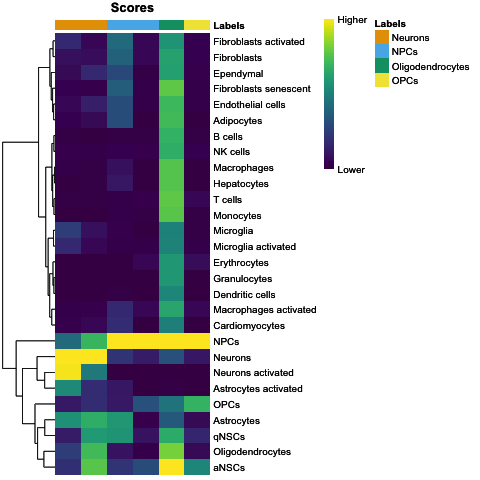

In [12]:
%%R
plotScoreHeatmap(pred)

In [13]:
adata.obs['singleR_anno'] = out['pred.labels']
adata.obs

,wb_anno,wb_conf_score,dev_wb_anno,dev_wb_conf_score,singleR_anno
1,326 OPC NN,0.999613,Oligodendrocyte: Oligodendrocyte precursor cell,1.000000,Neurons
2,326 OPC NN,0.999982,Oligodendrocyte: Oligodendrocyte precursor cell,1.000000,Neurons
3,326 OPC NN,0.999266,Oligodendrocyte: Oligodendrocyte precursor cell,0.999941,Oligodendrocytes
4,330 VLMC NN,0.004256,Vascular: Vascular smooth muscle,1.000000,NPCs
5,045 OB-STR-CTX Inh IMN,0.936748,Oligodendrocyte: Oligodendrocyte precursor cell,1.000000,NPCs
6,045 OB-STR-CTX Inh IMN,0.994075,Oligodendrocyte: Oligodendrocyte precursor cell,1.000000,OPCs


In [14]:
adata.obs[['wb_anno', 'singleR_anno']]

,wb_anno,singleR_anno
1,326 OPC NN,Neurons
2,326 OPC NN,Neurons
3,326 OPC NN,Oligodendrocytes
4,330 VLMC NN,NPCs
5,045 OB-STR-CTX Inh IMN,NPCs
6,045 OB-STR-CTX Inh IMN,OPCs
